In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
import seaborn

In [490]:
df = pd.read_csv('drug-consumptions-uci/Drug_Consumption.csv')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [491]:
print('There are', df.shape[0], 'rows and', str(df.shape[1]), 'columns.')

There are 1884 rows and 32 columns.


In [492]:
print(df.dtypes)

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object


In [493]:
all_subs = set(df.columns[13:])

# used legal substance within in last WEEK or more frequent: 1, otherwise: 0
legal = {'Alcohol', 'Caff', 'Choc', 'Legalh', 'Nicotine'}
mapping_legal = {'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 0, 'CL4': 0, 'CL5': 1, 'CL6': 1}
for subs in legal:
    df = df.replace({subs: mapping_legal})

# used illegal substance within in last YEAR or more frequent: 1, otherwise: 0
illegal = all_subs - legal
mapping_illegal = {'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
for subs in illegal:
    df = df.replace({subs: mapping_legal})

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,0,0,0,0,0,0,0,0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,0,0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,0,0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,1,0,0


count    1884.000000
mean        0.787155
std         1.122277
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: NumIllegal, dtype: float64


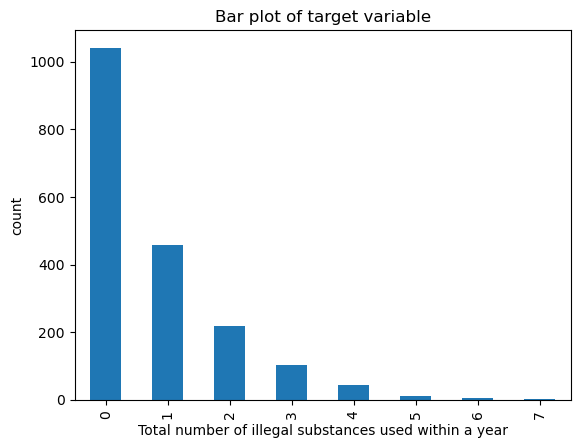

In [494]:
# legal substances -> features
# target variable: number of illegal substances used within a year
df['NumIllegal']= df[list(illegal)].sum(axis=1)
print(df['NumIllegal'].describe())

df.value_counts(df['NumIllegal']).plot.bar()
plt.title('Bar plot of target variable')
plt.xlabel('Total number of illegal substances used within a year')
plt.ylabel('count')
plt.show()

In [495]:
# features and target variables
df = df.drop(list(illegal), axis = 1)
df = df.drop('ID', axis = 1)
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Caff,Choc,Legalh,Nicotine,NumIllegal
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,0,0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,0,0,0,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,1,0,0,0,0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,1,1,0,0,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,1,0,0,1,0


In [496]:
# split function
from sklearn.model_selection import train_test_split

def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    if train_size + val_size + test_size != 1:
        raise ValueError('The sum of train_size, val_size, and test_size should be 1')
    if isinstance(random_state, int)==False:
        raise TypeError('random_state should be an integer')
        
    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X,y,\
    train_size = train_size,random_state = random_state)
    
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
    train_size = val_size/(val_size+test_size),random_state = random_state)
    
    # test the outputs
    if X_train.shape[0] < train_size*X.shape[0]-1 or X_train.shape[0] > train_size*X.shape[0]+1:
        raise Exception("output size of X_train is incorrect!")
    if X_val.shape[0] < val_size*X.shape[0]-1 or X_val.shape[0] > val_size*X.shape[0]+1:
        raise Exception("output size of X_val is incorrect!")
    if X_test.shape[0] < test_size*X.shape[0]-1 or X_test.shape[0] > val_size*X.shape[0]+1:
        raise Exception("output size of X_test is incorrect!")
    if len(y_train) < train_size*len(y)-1 or len(y_train) > train_size*len(y)+1:
        raise Exception("output size of y_train is incorrect!")
    if len(y_val) < val_size*len(y)-1 or len(y_val) > val_size*len(y)+1:
        raise Exception("output size of y_val is incorrect!")
    if len(y_test) < test_size*len(y)-1 or len(y_test) > test_size*len(y)+1:
        raise Exception("output size of y_test is incorrect!")
    if X_train.shape[0] + X_val.shape[0] + X_test.shape[0] != X.shape[0]:
        raise Exception("The sum of X_train, X_val, and X_test should be 1.")
    if y_train.shape[0] + y_val.shape[0] + y_test.shape[0] != y.shape[0]:
        raise Exception("The sum of y_train, y_val, and y_test should be 1.")
                    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [497]:
# split dataset
y = df['NumIllegal']
X = df.loc[:, df.columns != 'NumIllegal']
train_size = 0.6
val_size = 0.2
test_size = 0.2
random_state = 6

X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,train_size,val_size,test_size,random_state)

In [498]:
# ordinal encoding: age and education
ordinal_ftrs = ['Age','Education']
ordinal_cats = [['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], \
                ['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years',\
                'Left school at 18 years', 'Some college or university, no certificate or degree',\
                'Professional certificate/ diploma', 'University degree', 'Masters degree', 'Doctorate degree']]
enc = OrdinalEncoder(categories = ordinal_cats) 

# fit on X_train
enc.fit(X_train[ordinal_ftrs])

# transform X_train
ordinal_train = enc.transform(X_train[ordinal_ftrs])
X_train[ordinal_ftrs] = ordinal_train

# transform X_val
ordinal_val = enc.transform(X_val[ordinal_ftrs])
X_val[ordinal_ftrs] = ordinal_val

# transform X_test
ordinal_test = enc.transform(X_test[ordinal_ftrs])
X_test[ordinal_ftrs] = ordinal_test

In [499]:
# one hot encoding: gender, country, ethnicity
categorical_ftrs = ['Gender','Country','Ethnicity']
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

# fit on X_train
enc.fit(X_train[categorical_ftrs])
ohe_ftrs = enc.get_feature_names_out(categorical_ftrs)

# transform X_train
ohe_train = enc.transform(X_train[categorical_ftrs])
X_train = X_train.drop(categorical_ftrs, axis=1)
X_train[ohe_ftrs] = ohe_train

# transform X_val
ohe_val = enc.transform(X_val[categorical_ftrs])
X_val = X_val.drop(categorical_ftrs, axis=1)
X_val[ohe_ftrs] = ohe_val

# transform X_test
ohe_test = enc.transform(X_test[categorical_ftrs])
X_test = X_test.drop(categorical_ftrs, axis=1)
X_test[ohe_ftrs] = ohe_test

In [500]:
# normalize numerical features
# std_ftrs = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train[std_ftrs])
# X_val_std = scaler.transform(X_val[std_ftrs])
# X_test_std = scaler.transform(X_test[std_ftrs])

# X_train = X_train.drop(std_ftrs, axis=1)
# X_train[std_ftrs] = X_train_std

# X_val = X_val.drop(std_ftrs, axis=1)
# X_val[std_ftrs] = X_val_std

# X_test = X_test.drop(std_ftrs, axis=1)
# X_test[std_ftrs] = X_test_std

In [501]:
# transformed features and target variables
transformed_X = pd.concat([X_train, X_val, X_test])
transformed_X = transformed_X.sort_index()
transformed_df = pd.concat([transformed_X, y], axis = 1)
transformed_df.head()

,Age,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White,NumIllegal
0,1.0,8.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,2.0,5.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.0,7.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,2.0,8.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,5.0,3.0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


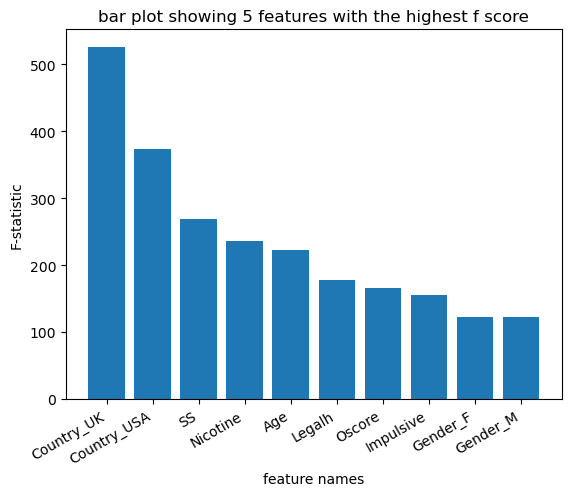

In [502]:
# linear correlation
transformed_y = transformed_df['NumIllegal']
transformed_X = transformed_df.loc[:, transformed_df.columns != 'NumIllegal']

f, p = f_regression(transformed_X,transformed_y)
top5_f_index = (np.argsort(f)[-10:])[::-1]
top5_f = f[top5_f_index]
c_names = transformed_X.columns[top5_f_index]

fig, ax = plt.subplots()
ax.bar(c_names,top5_f)

plt.xticks(rotation=30, ha='right')
plt.xlabel('feature names')
plt.ylabel('F-statistic')
plt.title('bar plot showing 5 features with the highest f score')
plt.show()

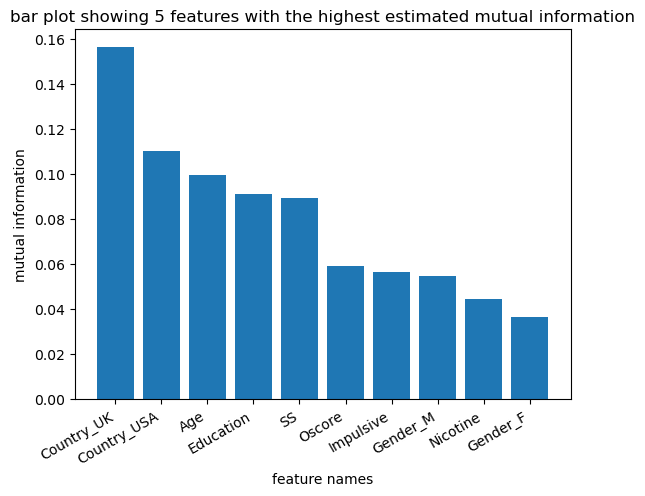

In [503]:
# non-linear correlation 
MI = mutual_info_regression(transformed_X,transformed_y, random_state=6)

top5_MI_index = (np.argsort(MI)[-10:])[::-1]
top5_MI = MI[top5_MI_index]
c_names = transformed_X.columns[top5_MI_index]

fig, ax = plt.subplots()
ax.bar(c_names,top5_MI)

plt.xticks(rotation=30, ha='right')
plt.xlabel('feature names')
plt.ylabel('mutual information')
plt.title('bar plot showing 5 features with the highest estimated mutual information')
plt.show()

NumIllegal    0    1    2   3   4  5  6  7
Age                                       
0.0         192  235  118  63  21  8  5  1
1.0         287   87   60  29  15  1  1  1
2.0         252   67   27   4   4  1  0  0
3.0         221   49   14   7   2  1  0  0
4.0          74   18    0   0   1  0  0  0
5.0          15    3    0   0   0  0  0  0


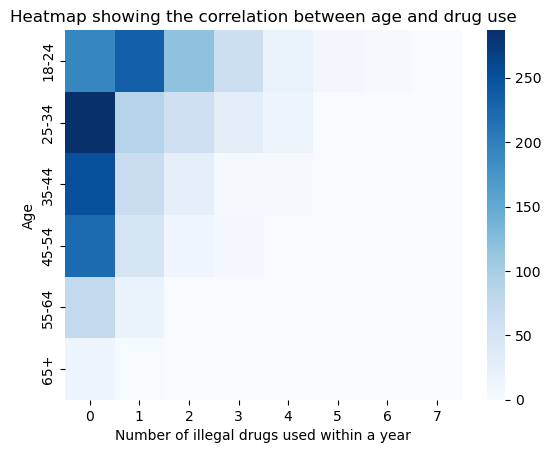

In [504]:
Age_NumIllegal = transformed_df.groupby(['Age','NumIllegal']).size().unstack(fill_value=0)
print(Age_NumIllegal)
yticks = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
seaborn.heatmap(Age_NumIllegal, cmap="Blues", yticklabels=yticks)

plt.title('Heatmap showing the correlation between age and drug use')
plt.ylabel('Age')
plt.xlabel('Number of illegal drugs used within a year')
plt.show()

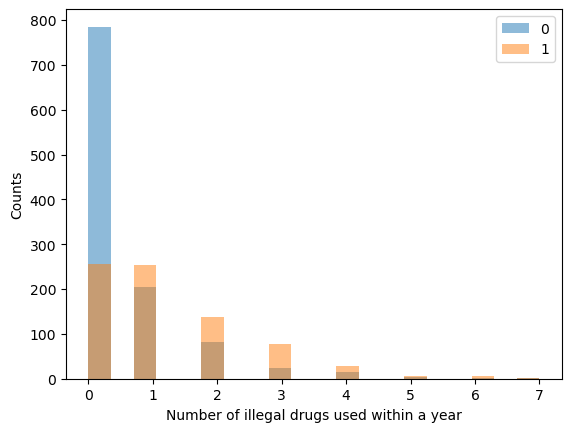

In [505]:
categories = transformed_df['Nicotine'].unique()
bin_range = (transformed_df['NumIllegal'].min(), transformed_df['NumIllegal'].max())
for c in categories:
    plt.hist(transformed_df[transformed_df['Nicotine']==c]['NumIllegal'],\
             alpha=0.5,label=c,range=bin_range,bins=20)
plt.legend() 
plt.ylabel('Counts') 
plt.xlabel('Number of illegal drugs used within a year') 
plt.show()

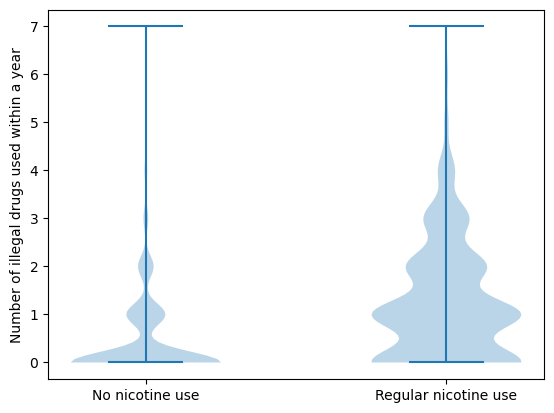

In [506]:
dataset = [transformed_df[transformed_df['Nicotine']==0]['NumIllegal'].values, 
           transformed_df[transformed_df['Nicotine']==1]['NumIllegal'].values]
plt.violinplot(dataset = dataset) 
plt.xticks([1,2],['No nicotine use','Regular nicotine use']) 
plt.ylabel('Number of illegal drugs used within a year')
plt.show()

NumIllegal    0   1   2   3   4  5  6  7
SS                                      
-2.07848     61   6   2   1   0  0  0  1
-1.54858     75   7   4   0   1  0  0  0
-1.18084    103  14   9   4   1  0  0  0
-0.84637    131  30   5   3   0  0  0  0
-0.52593    147  44  11   5   2  1  1  0
-0.21575    145  51  18   8   1  0  0  0
 0.07987    117  55  31   9   4  2  1  0
 0.40148    108  77  36  21   3  2  1  1
 0.76540     70  70  40  14  12  4  1  0
 1.22470     56  73  38  29  12  1  1  0
 1.92173     28  32  25   9   7  1  1  0


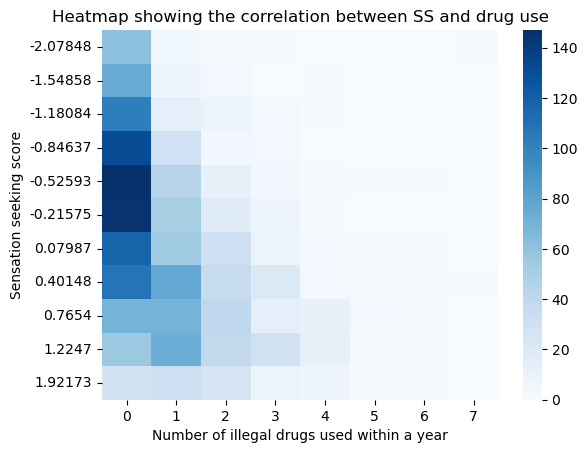

In [507]:
SS_NumIllegal = transformed_df.groupby(['SS','NumIllegal']).size().unstack(fill_value=0)
print(SS_NumIllegal)
seaborn.heatmap(SS_NumIllegal, cmap="Blues")

plt.title('Heatmap showing the correlation between SS and drug use')
plt.ylabel('Sensation seeking score')
plt.xlabel('Number of illegal drugs used within a year')
plt.show()

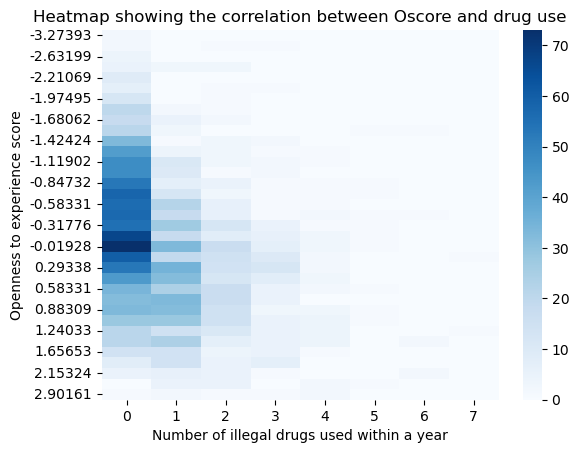

In [508]:
Os_NumIllegal = transformed_df.groupby(['Oscore','NumIllegal']).size().unstack(fill_value=0)
seaborn.heatmap(Os_NumIllegal, cmap="Blues")

plt.title('Heatmap showing the correlation between Oscore and drug use')
plt.ylabel('Openness to experience score')
plt.xlabel('Number of illegal drugs used within a year')
plt.show()